In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/home/hbkoziel/pyfesom/data/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf/'

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh


In [4]:
tracername = 'eke'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

print 'loading data...'
EKE_sel = data.eke.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
EKE_sel = EKE_sel.compute()
print 'loading done'

# EKE_march = EKE_sel[data['time.month']==3]
# EKE_march = EKE_march.compute()
# EKE_march_mean = EKE_sel[data['time.month']==3].mean(dim='time')
# EKE_march_mean = EKE_march_mean.compute()

print 'deriving statistics...'
EKE_sept = EKE_sel[data['time.month']==9]
EKE_sept = EKE_sept.compute()
EKE_sept_mean = EKE_sept.mean(dim='time')
EKE_sept_mean = EKE_sept_mean.compute()

pf = np.polyfit(years, EKE_sept, 1)
EKE_trend = pf[0]
print 'done'

loading data...
loading done
deriving statistics...
done


In [13]:
tracername = 'cur50m'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

CUR_sel = data.cur50m.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
CUR_sel = CUR_sel.compute()

# CUR_march = CUR_sel[data['time.month']==3]
# CUR_march = CUR_march.compute()

CUR_sept = CUR_sel[data['time.month']==9]
CUR_sept = CUR_sept.compute()
CUR_sept_mean = CUR_sept.mean(dim='time')
CUR_sept_mean = CUR_sept_mean.compute()

pf = np.polyfit(years, CUR_sept, 1)
CUR_trend = pf[0]

For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in greater_equal


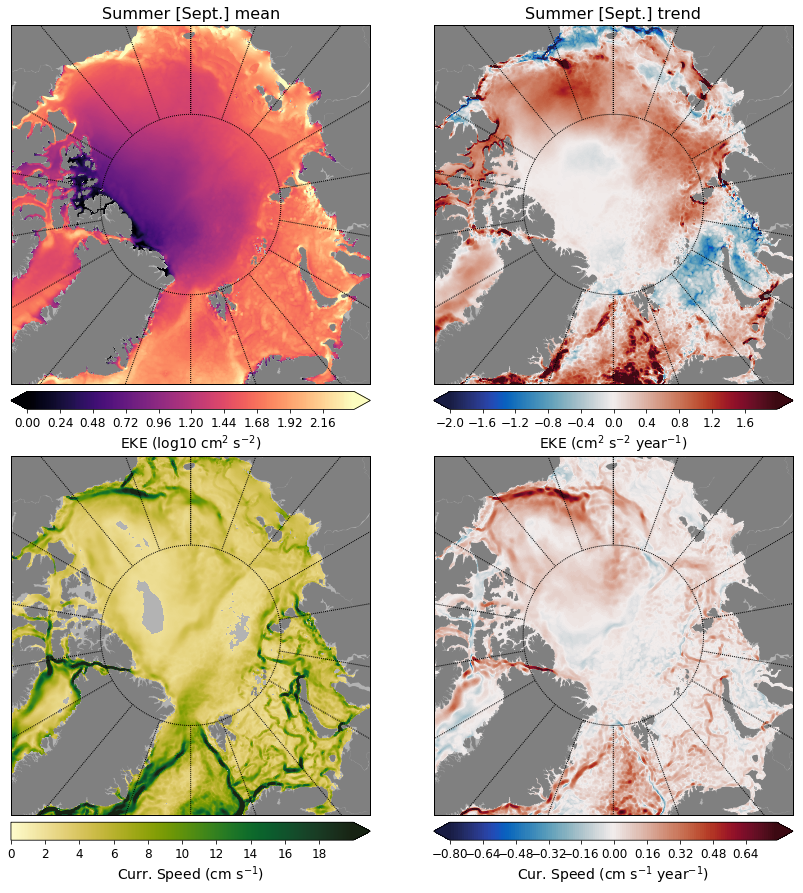

In [10]:
import pyfesom as pf
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

EKE_sept_mean[EKE_sept_mean == 0] = np.nan
data, elem_no_nan = pf.get_data(EKE_sept_mean,mesh,0)
ax1      = fig.add_subplot(221)
contours = np.arange(0, 2.4, .01)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, np.log10(data) , levels=contours, cmap=cm.magma, extend='both')
label = 'EKE (log10 cm$^{2}$ s$^{-2}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Summer [Sept.] mean', fontsize=16)

EKE_trend[EKE_trend == 0] = np.nan
data2, elem_no_nan = pf.get_data(EKE_trend,mesh,0) 
ax2      = fig.add_subplot(222)
contours = np.arange(-2, 2, .01)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'EKE (cm$^{2}$ s$^{-2}$ year$^{-1}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Summer [Sept.] trend', fontsize=16)

CUR_sept_mean[CUR_sept_mean <= 0.02] = np.nan
data, elem_no_nan = pf.get_data(CUR_sept_mean*100,mesh,0)
ax3      = fig.add_subplot(223)
contours = np.arange(0, 20, .01)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data , levels=contours, cmap=cmap.cm.speed, extend='max')
label = 'Curr. Speed (cm s$^{-1}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

CUR_trend[CUR_trend == 0] = np.nan
data2, elem_no_nan = pf.get_data(CUR_trend*100,mesh,0) 
ax4      = fig.add_subplot(224)
contours = np.arange(-.8, .8, .01)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'Cur. Speed (cm s$^{-1}$ year$^{-1}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

fig.subplots_adjust(wspace=0.02,hspace=0.12)

plt.savefig(save_path+'FIG6.png', dpi = 300, bbox_inches='tight') 

For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater_equal


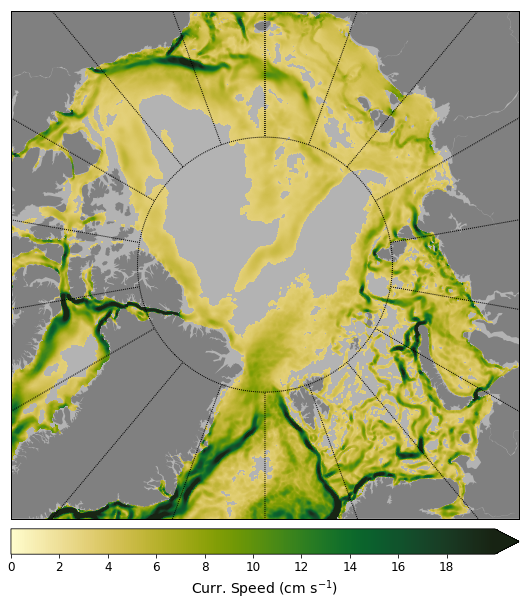

In [15]:
import pyfesom as pf

fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
CUR_sept_mean[CUR_sept_mean <= 0.03] = np.nan
data, elem_no_nan = pf.get_data(CUR_sept_mean*100,mesh,0)
ax1      = fig.add_subplot(111)
contours = np.arange(0, 20, .01)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data , levels=contours, cmap=cmap.cm.speed, extend='max')
label = 'Curr. Speed (cm s$^{-1}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)